In [11]:
%pylab inline
import numpy as np
from pygadgetreader import *
from octopus import density, orbit_cm


Populating the interactive namespace from numpy and matplotlib


In [16]:
ic_snap = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
ic_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
ic_ids = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')


fc_snap = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
fc_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
fc_ids = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [46]:
def mw_particles(xyz, vxyz, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    index_lmc = np.where(ids>=id_cut)[0]
    return xyz[index_mw], vxyz[index_mw], xyz[index_lmc], vxyz[index_lmc]

In [47]:
mw_ic_pos, mw_ic_vel, lmc_ic_pos, lmc_ic_vel = mw_particles(ic_snap, ic_vel, ic_ids, 1000000)
mw_fc_pos, mw_fc_vel, lmc_fc_pos, lmc_fc_vel = mw_particles(fc_snap, fc_vel, fc_ids, 1000000)

In [24]:
xic_cm, yic_cm, zic_cm, vx_ic_cm, vy_ic_cm, vz_ic_cm = orbit_cm.CM(mw_ic_pos, mw_ic_vel)
xfc_cm, yfc_cm, zfc_cm, vx_fc_cm, vy_fc_cm, vz_fc_cm = orbit_cm.CM(mw_fc_pos, mw_fc_vel)

print 'ic coordinates: ', xic_cm, yic_cm, zic_cm
print 'fc coordinates: ', xfc_cm, yfc_cm, zfc_cm

ic coordinates:  0.0326767973748 -0.0160168181304 -0.025037442445
fc coordinates:  3.14213492468 33.1085245965 -10.5106429199


In [32]:
# Recenter

mw_ic_pos[:,0] = mw_ic_pos[:,0] - xic_cm
mw_ic_pos[:,1] = mw_ic_pos[:,1] - yic_cm
mw_ic_pos[:,2] = mw_ic_pos[:,2] - zic_cm

mw_fc_pos[:,0] = mw_fc_pos[:,0] - xfc_cm
mw_fc_pos[:,1] = mw_fc_pos[:,1] - yfc_cm
mw_fc_pos[:,2] = mw_fc_pos[:,2] - zfc_cm

In [83]:
index_cut_i = np.where(np.sqrt(((mw_ic_pos[:,0])**2.0) + ((mw_ic_pos[:,1])**2.0) + ((mw_ic_pos[:,2])**2.0))<100)[0]
index_cut_f = np.where(np.sqrt(((mw_fc_pos[:,0])**2.0) + ((mw_fc_pos[:,1])**2.0) + ((mw_fc_pos[:,2])**2.0))<100)[0]

mw_ic_pos = mw_ic_pos[index_cut_i]
mw_fc_pos = mw_fc_pos[index_cut_f]

mw_ic_vel = mw_ic_vel[index_cut_i]
mw_fc_vel = mw_fc_vel[index_cut_f]

(-100, 100)

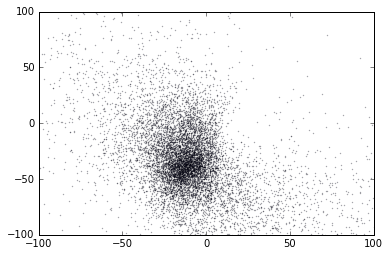

In [84]:
slides_x = np.where((lmc_fc_pos[:,0]<-10) & (lmc_fc_pos[:,0]>-12))[0]
scatter(lmc_fc_pos[slides_x,1], lmc_fc_pos[slides_x,2], s=0.1, alpha=0.5)
xlim(-100, 100)
ylim(-100, 100)
#axis('equal')

In [72]:
def slicing(xyz, dr, r, direction=0):
    index_slice = np.where((xyz[:,direction]<r) & (xyz[:,direction]>r-dr))[0]
    return xyz[index_slice,0], xyz[index_slice,1], xyz[index_slice,2]

In [81]:
slices = np.linspace(-40, 50, 10)
print slices


[-40. -30. -20. -10.   0.  10.  20.  30.  40.  50.]


In [ ]:
for i in range(len(slices)):
    print i
    xyz_ic = slicing(mw_ic_pos, 1, slices[i], 0)
    rho_ic = density.grid(xyz_ic[1], xyz_ic[2], xyz_ic[0], 100)
    xyz_fc = slicing(mw_fc_pos, 1, slices[i], 0)
    rho_fc = density.grid(xyz_fc[1], xyz_fc[2], xyz_fc[0], 100)
    rho_rate = rho_ic/rho_fc
    figure(figsize=(26, 10))
    subplot(1, 3, 1)
    title('$\mathrm{Isolated\ MW\ t=i}$', fontsize=25)
    imshow(np.log10(rho_ic.T), origin='lower', 
           extent=[-100, 100, -100, 100], 
           cmap='magma',vmin=-9, vmax=2)
    xlabel('$Y$', fontsize=25)
    ylabel('$Z$', fontsize=25)

    colorbar()
    subplot(1, 3, 2)
    title('$\mathrm{Isolated\ MW\ t=f }$', fontsize=25)
    imshow(np.log10(rho_fc.T), origin='lower', 
           extent=[-100, 100, -100, 100], 
           cmap='magma',vmin=-9, vmax=2)
    xlabel('$Y$', fontsize=25)
    ylabel('$Z$', fontsize=25)

    colorbar()
    subplot(1, 3, 3)
    title('$\mathrm{initial/final}$', fontsize=25)
    imshow(np.log10(rho_rate.T), origin='lower', 
           extent=[-100, 100, -100, 100], 
           cmap='magma',vmin=-1, vmax=1)
    colorbar()
    xlabel('$Y$', fontsize=25)
    ylabel('$Z$', fontsize=25)
    
    savefig('slices/MWwakes_{}.png'.format(i))
    clf()

0
1

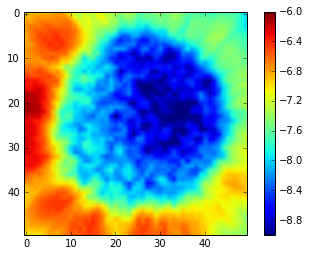

In [29]:
imshow(np.log10(rho_ic.T), vmin=-9, vmax=-6)
colorbar()

In [35]:
# phase space
r_i = np.sqrt(ic_snap[:,0]**2.0 + ic_snap[:,1]**2.0 + ic_snap[:,2]**2.0)
r_f = np.sqrt(fc_snap[:,0]**2.0 + fc_snap[:,1]**2.0 + fc_snap[:,2]**2.0)
v_i = np.sqrt(ic_vel[:,0]**2.0 + ic_vel[:,1]**2.0 + ic_vel[:,2]**2.0)
v_f = np.sqrt(fc_vel[:,0]**2.0 + fc_vel[:,1]**2.0 + fc_vel[:,2]**2.0)


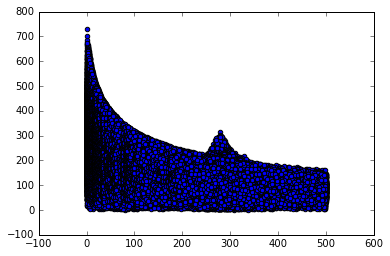

In [36]:
scatter(r_i, v_i, s=0.1)